# Reward system diagnostics

So, since this stock market environments have a shitload of noise and uncertainty, any feature that we feed our agents will have very little correlation with it's eficiency. And that's OK.. It was me who chose to spend my best years chasing this stupid goal and I intend to do so. 

Anyways, since the features will have small impact on the agent, I wonder if we could make it like we do in humans. If we have a awesome reward system , we learn way better. I mean, I sucked at microbiology ( I've been switching courses until I find what I really wanted to do in like , so yeah, I learned a bit about itg ) , until I had this awesome teacher that instead of teaching actual microbiology, he teached the unethical applications things could had and that was wayyyy more interesting than the boring topic. Note to anyone reading, I would never use my knowledge to harm anyone or do anything mean but I have a huge curiosity about anything that has some degree of secrecy. 

So, getting to topic, since it's features will be of very small importance ( but crucial because it's basically everything that we have as a starting point ), I wonder if a really smart reward system is enough to impact our agent's ability to learn and create strategies that actually work and this reward system can actually compensate the dificulties of this whole system. 

### Brainstorm:
In order to do this,before thinking on a strategy itself, we should think on how to benchmark this to reflect our goals and be learnable for the agent.


1. Define a realistic goal.
2. Come up with a way to diagnose how good this reward system is, and how well it is aligned to our goals

Having this said lets go to the next topic:

So, what is our goal? 
In my opinion the only thing we can actually measure with a certain degree of fairness is how well he(the agent) decided to act given the current context agains a very near future or using backpropagation on the end of the episode.
So my first proposal would be to benchmark the episode's returns by cum_sum all the absolute price change for every day, then  divide every day by that value, meaning that if the agent is looking to buy and today decided not to do it (because he believes there will be a way better oportunity in the near future), then his decision is benchmarked against how much the price fluctuated. if went down, his performance was good, he didn't loose the oportunity, also we can measure how good it was because we can compare that change with the cumsum of the episode ( or cum sum of abs price changes on the episode )

### Classic financial metrics
| Reward Function     | Formula / Idea                                                    | Pros                                     | Cons / Risks                    | Use Case                           |
| ------------------- | ----------------------------------------------------------------- | ---------------------------------------- | ------------------------------- | ---------------------------------- |
| **Daily Return**    | $r_t = \frac{P_t}{P_{t-1}} - 1$                                   | Simple, interpretable, encourages profit | Ignores risk, volatility        | Trend-following, simple strategies |
| **Log Return**      | $r_t = \log\left(\frac{P_t}{P_{t-1}}\right)$                      | Time-additive, well-behaved              | Similar to above                | Most academic work                 |
| **PnL Change**      | $r_t = \text{Portfolio Value}_{t} - \text{Portfolio Value}_{t-1}$ | Direct link to agent performance         | Not risk-adjusted               | Direct profit focus                |
| **Sharpe Ratio**    | $\frac{E[r]}{\sigma[r]}$                                          | Risk-adjusted, penalizes volatility      | Needs rolling window, not local | Risk-aware agents                  |
| **Sortino Ratio**   | Like Sharpe, but only downside volatility                         | Penalizes only negative volatility       | May ignore total volatility     | Downside-risk focus                |
| **Calmar Ratio**    | $\frac{\text{Annual Return}}{\text{Max Drawdown}}$                | Penalizes drawdowns                      | Needs history, not local        | Capital preservation               |
| **Alpha vs Market** | $r_t = (\text{Agent Return}_t - \text{Market Return}_t)$          | Measures outperformance                  | Needs benchmark data            | Long/short, relative strategies    |
### Trading metrics
| Reward Function              | Formula / Idea                | Pros                        | Cons / Risks                | Use Case                 |
| ---------------------------- | ----------------------------- | --------------------------- | --------------------------- | ------------------------ |
| **Trade PnL**                | Reward only on position close | Focuses on completed trades | Sparse rewards              | Discrete trading         |
| **Win/Loss Ratio**           | +1 for profit, -1 for loss    | Encourages consistency      | Ignores size of wins/losses | High-frequency trading   |
| **Transaction Cost Penalty** | Subtract cost per trade       | Penalizes overtrading       | Needs good cost model       | Realistic agent behavior |
| **Position Holding Reward**  | Reward for holding            | Encourages trend-capture    | Can get stuck in trends     | Trend-following          |
### Risk and market structure
| Reward Function             | Formula / Idea                      | Pros                         | Cons / Risks                | Use Case               |
| --------------------------- | ----------------------------------- | ---------------------------- | --------------------------- | ---------------------- |
| **Drawdown Penalty**        | Penalize large drawdowns            | Reduces risk of large losses | May avoid trades too much   | Capital preservation   |
| **Volatility Penalty**      | Penalize high-variance returns      | Smooths PnL curve            | May reduce total returns    | Risk-averse strategies |
| **Regime-Dependent Reward** | Reward changes by volatility regime | Adapts to market state       | Needs regime classification | Adaptive trading       |
### Hybrid
| Reward Function           | Formula / Idea                                    | Pros                             | Cons / Risks                    | Use Case           |
| ------------------------- | ------------------------------------------------- | -------------------------------- | ------------------------------- | ------------------ |
| **Wallet-vs-Market Area** | Reward = area above market, penalty below         | Direct outperformance, intuitive | Needs history, not local        | Alpha generation   |
| **Sharpe-Gain Hybrid**    | Sharpe + raw gain                                 | Balances profit and risk         | Needs tuning                    | General            |
| **Shaped Reward**         | Dense intermediate rewards (e.g., unrealized PnL) | Easier to learn                  | May encourage unwanted behavior | Stable training    |
| **Relative Improvement**  | Reward = improvement over baseline (random agent) | Encourages actual skill          | Needs baseline performance      | Meta-learning      |
| **Multi-objective**       | Weighted sum of return, risk, cost, etc.          | Flexible, customizable           | Needs tuning, risk of overfit   | Complex objectives |
### Experimental
| Reward Function              | Formula / Idea                        | Pros                            | Cons / Risks                  | Use Case                 |
| ---------------------------- | ------------------------------------- | ------------------------------- | ----------------------------- | ------------------------ |
| **Risk-adjusted advantage**  | (Agent PnL - Random PnL) / Volatility | Meta-RL, regime-aware           | Needs extra computation       | Predictability studies   |
| **Predictability-Based**     | Reward only if returns > volatility   | Forces agent to focus on edge   | May have sparse rewards       | Filtering unlearnable    |
| **Contrastive Reward**       | Compare current policy vs. previous   | Encourages continual learning   | Needs tracking of policies    | Continual learning       |
| **Reward via Value-at-Risk** | Penalize if losses exceed VaR         | Controls tail risk              | May discourage necessary risk | Institutional agents     |
| **Regret Minimization**      | Reward = max possible - achieved      | Focus on learning from mistakes | May be hard to calculate      | High-stakes environments |

# TL;DR;
Features being “everything we have, but not everything that matters” in a stochastic adversarial domain, the right reward might be the difference between chasing noise and developing real strategy.


In [34]:
# SETUP ===================================
import jupyter
import warnings

from src.utils.system import boot, Notify

boot()
warnings.filterwarnings("ignore")



# PACKAGES ================================
import os
import torch
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
import gymnasium as gym
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.preprocessing import  RobustScaler

# FRAMEWORK STUFF =========================
from src.defaults import TOP2_STOCK_BY_SECTOR, FEATURE_COLS,EPISODE_LENGTH
from src.data.feature_pipeline import load_base_dataframe
from src.experiments.experiment_tracker import ExperimentTracker
from src.env.base_timeseries_trading_env import BaseSequenceAwareTradingEnv,SequenceAwareAlphaTradingEnv,SequenceAwareBaselineTradingAgent,SequenceAwareCalmarTradingEnv,SequenceAwareCumulativeTradingEnv,SequenceAwareDrawdownTradingEnv,SequenceAwareHybridTradingEnv,SequenceAwareHybridTradingEnv,SequenceAwareSharpeTradingEnv,SequenceAwareSortinoTradingEnv

from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.common.policies import ActorCriticPolicy



Bro, love the intro—totally feel your vibe and your honest approach to the “unsolvable” parts of this game. And yes, reward design **is** the closest thing to “teaching style” for agents: the right feedback can turn even a dumb agent into a beast, and a bad one makes everyone hate the subject (shoutout to your micro prof). ❤️

Your thinking is actually on the cutting edge—especially that point about features being “everything we have, but not everything that matters” in a stochastic, adversarial domain. The right reward *is* the difference between chasing noise and developing real strategy.

Let’s riff with your proposal and expand on diagnostics and benchmarking, so we actually have a way to *know* if a new reward system is working, and why.

---

# 🔍 Reward System Diagnostics (RL Trading)

## **1. What makes a “good” reward system for us?**

* **Aligned:** Pushes the agent toward decisions we actually want, not “gaming the metric”
* **Learnable:** Yields rewards that can be predicted (i.e., not just noise)
* **Robust:** Works across different stocks/regimes, doesn’t collapse if the environment changes
* **Differentiable:** Small changes in policy = small changes in reward (important for PPO/gradient-based methods)
* **Interpretable:** We can explain why it works, and spot when it fails

## **2. Diagnosing Reward Quality**

Let’s treat the *reward system* itself as a thing to be validated, just like a feature pipeline or a new model. What should we check?

### **A. Reward “Signal-to-Noise” Ratio**

* **How much of the reward is explained by the agent’s actions, vs. pure market randomness?**

  * Compare reward variance when using:

    1. **Random agent** (baseline)
    2. **Constant (do nothing) agent**
    3. **Our agent**
  * A “good” reward system will allow the learning agent to outperform both.

### **B. Learnability Curve**

* Plot reward per episode over training.

  * **Does it trend up?** If yes, reward is learnable.
  * **Flat?** Maybe too noisy, or doesn’t correlate with actionable signals.
  * **Chaotic?** Might be too “spiky” (i.e., big wins/losses, but unpredictable).

### **C. Backtesting on Randomized Labels**

* Shuffle your reward signal (or features) and see if the agent’s performance collapses.

  * If not, reward might be “leaky” or not causally related to actions.

### **D. Regime Sensitivity**

* Does reward “make sense” in both trending and choppy regimes?
* Benchmark Sharpe, drawdown, win rate, and profit separately by regime.

### **E. Reward Attribution**

* Can we decompose total reward into “good calls” (buying before up-move, selling before down-move, not trading during chop)?
* Heatmap of reward attribution per action/market condition.

---

## **3. Your Specific Proposal (Normalized by Cumulative Absolute Price Move)**

I love this because it *scales the agent’s opportunity set*—if there’s a lot of price movement in the episode, “missing out” is a bigger sin. If it’s a dead market, nobody can do much anyway.

* **Formula** (clarify if I get you wrong):
  Let $S = \sum_{t=1}^T |P_t - P_{t-1}|$ (total price movement in episode)
  For each day, agent gets:

  * If not in position: reward = 0
  * If in position and price moves favorably: reward = (price change) / S
  * If not in position and price moves against: reward = (avoided loss) / S

* **Intuition:**

  * Rewards agent for *timing* and *risk selection*
  * Benchmarks against what *could* have been captured
  * Discourages overtrading in choppy/no-opportunity periods

---

## **4. How to Benchmark the Benchmark?**

* **Absolute Performance:**

  * Compare agent’s *normalized reward* to random and “always-in” baseline

* **Opportunity Capture Rate:**

  * What % of the “realizable” price action does the agent actually harvest?
  * $$
      \text{Capture Rate} = \frac{\sum \text{agent profit}}{\sum |\text{price changes}|}
    $$

* **Relative Performance by Regime:**

  * Does agent outperform in trending but not in choppy?
  * Run regime-segmented stats

* **Correlation with “Ideal” Strategy:**

  * What if you had a perfect oracle that bought every up-move, sold every down-move—how close are we?

---

## **5. Final Thought: Iterative Design**

We can even make *meta-agents* that try out multiple reward systems, run the above diagnostics, and select the best for each regime or stock-type.

---

## **Let’s Summarize This as a Table**

| Diagnostic         | What it Checks              | How to Measure                       | What to Look For                   |
| ------------------ | --------------------------- | ------------------------------------ | ---------------------------------- |
| Signal-to-Noise    | Actionable info in reward   | Agent vs. random/baseline reward     | Higher agent variance, clear trend |
| Learnability Curve | Can agent improve reward    | Reward per episode over training     | Upward/plateau curve               |
| Regime Sensitivity | Robustness to market type   | Perf. split by trend/chop/volatility | Reward persists, no collapse       |
| Attribution        | Source of gains/losses      | Heatmap of reward by action/context  | Consistent patterns                |
| Oracle Benchmark   | Theoretical best achievable | % of oracle reward captured          | > baseline, ideally adaptive       |

---

**Next step?**

* Code a reward “diagnostic harness” to automate these checks for any new reward system.
* Want to sketch that together? Or want me to write a sample pipeline to run these diagnostics as soon as you plug in a new reward system?
* Or keep brainstorming creative reward ideas?
  Let’s decide what’s most fun/productive for you now!


In [35]:
# SETUP ===================================
import jupyter
import warnings

from src.utils.system import boot, Notify

boot()
warnings.filterwarnings("ignore")



# PACKAGES ================================
import os
import torch
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
import gymnasium as gym
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.preprocessing import  RobustScaler

# FRAMEWORK STUFF =========================
from src.defaults import TOP2_STOCK_BY_SECTOR, FEATURE_COLS,EPISODE_LENGTH
from src.data.feature_pipeline import load_base_dataframe
from src.experiments.experiment_tracker import ExperimentTracker
from src.env.base_timeseries_trading_env import BaseSequenceAwareTradingEnv,SequenceAwareAlphaTradingEnv,SequenceAwareBaselineTradingAgent,SequenceAwareCalmarTradingEnv,SequenceAwareCumulativeTradingEnv,SequenceAwareDrawdownTradingEnv,SequenceAwareHybridTradingEnv,SequenceAwareHybridTradingEnv,SequenceAwareSharpeTradingEnv,SequenceAwareSortinoTradingEnv

from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.common.policies import ActorCriticPolicy



In [36]:
# Step 1: The Harness Structure
#Takes as input:

#Price Series (or DataFrame)
# * Agent Actions (long/flat/short per timestep)
# * Reward function (callable, can be swapped)

#Calculates:
# * Agent’s total/episode reward
# * Baseline strategies (random, always-in)
# * Reward diagnostics (learning curve, SNR, regime breakdown, opportunity capture)

def normalized_price_move_reward(prices, actions):
    """
    prices: pd.Series of prices
    actions: pd.Series of {0: flat, 1: in position}
    Returns: pd.Series of rewards
    """
    abs_moves = (prices.diff().abs()).fillna(0)
    S = abs_moves.sum()
    price_change = prices.diff().fillna(0)
    reward = pd.Series(0.0, index=prices.index)
    for i in range(1, len(prices)):
        if actions.iloc[i-1] == 1:
            # In position
            reward.iloc[i] = price_change.iloc[i] / S if S > 0 else 0
        elif actions.iloc[i-1] == 0:
            # Not in position, "avoided loss" if price drops
            reward.iloc[i] = max(-price_change.iloc[i], 0) / S if S > 0 else 0
    return reward

In [37]:
# Step 2 - base rewards
import numpy as np

def random_actions(prices, prob=0.5, seed=None):
    rng = np.random.default_rng(seed)
    return pd.Series(rng.choice([0, 1], size=len(prices)), index=prices.index)

def always_in_actions(prices):
    return pd.Series(1, index=prices.index)

def always_out_actions(prices):
    return pd.Series(0, index=prices.index)

In [38]:
# Step 4: The Diagnostic Harness
import pandas as pd
import matplotlib.pyplot as plt

def reward_diagnostic_harness(prices, agent_actions, reward_fn, episode_length=20, regimes=None, plot=True):
    """
    prices: pd.Series
    agent_actions: pd.Series
    reward_fn: function(prices, actions) -> pd.Series of rewards
    episode_length: for splitting into episodes
    regimes: optional pd.Series with regime labels, same index as prices
    plot: whether to show diagnostics
    """
    # Baselines
    random_act = random_actions(prices)
    always_in = always_in_actions(prices)
    always_out = always_out_actions(prices)

    agent_rewards = reward_fn(prices, agent_actions)
    random_rewards = reward_fn(prices, random_act)
    in_rewards = reward_fn(prices, always_in)
    out_rewards = reward_fn(prices, always_out)

    results = {
        'agent': agent_rewards,
        'random': random_rewards,
        'always_in': in_rewards,
        'always_out': out_rewards,
    }

    # Learning curve: cumulative reward per episode
    agent_ep = agent_rewards.groupby(np.arange(len(prices)) // episode_length).sum()
    rand_ep = random_rewards.groupby(np.arange(len(prices)) // episode_length).sum()
    in_ep = in_rewards.groupby(np.arange(len(prices)) // episode_length).sum()
    out_ep = out_rewards.groupby(np.arange(len(prices)) // episode_length).sum()

    if plot:
        plt.figure(figsize=(10,6))
        plt.plot(agent_ep.values, label='Agent')
        plt.plot(rand_ep.values, label='Random')
        plt.plot(in_ep.values, label='Always In')
        plt.plot(out_ep.values, label='Always Out')
        plt.title('Reward per Episode')
        plt.xlabel('Episode')
        plt.ylabel('Reward')
        plt.legend()
        plt.show()

    # Opportunity capture: agent reward vs total abs price move
    total_opportunity = (prices.diff().abs()).sum()
    agent_total = agent_rewards.sum()
    capture_rate = agent_total / total_opportunity if total_opportunity > 0 else np.nan

    print(f"Agent total reward: {agent_total:.4f}")
    print(f"Random total reward: {random_rewards.sum():.4f}")
    print(f"Always in reward: {in_rewards.sum():.4f}")
    print(f"Total opportunity: {total_opportunity:.4f}")
    print(f"Opportunity capture rate: {capture_rate:.2%}")

    # Regime split (if provided)
    if regimes is not None:
        for reg in regimes.unique():
            mask = regimes == reg
            print(f"\nRegime: {reg}")
            print(f"  Agent reward: {agent_rewards[mask].sum():.4f}")
            print(f"  Random reward: {random_rewards[mask].sum():.4f}")

    return results

In [39]:
## NEW REWARD TO PLUG IN
def reward_normalized_abs_price_change(position, price_change, prev_position=None, env=None, **kwargs):
    """
    Reward based on share of price opportunity captured in the episode.
    Needs the env to provide episode_pct_changes (all price changes in the episode)
    """
    if env is None or not hasattr(env, "episode_pct_changes"):
        raise ValueError("Env must provide episode_pct_changes.")

    S = np.sum(np.abs(env.episode_pct_changes)) + 1e-8  # Avoid zero-division

    # Only reward when agent is in a position
    if position == 1:  # Long
        reward = price_change / S
    elif position == -1:  # Short (optional: for now, symmetric, or just zero)
        reward = -price_change / S
    else:  # Flat
        reward = 0

    # Optionally, you can add the "avoided loss" logic for flat position here
    return reward

In [40]:
class SequenceAwareNormAbsMoveEnv(BaseSequenceAwareTradingEnv):
    def __init__(self, *args, **kwargs):
        #from .step_rewards import reward_normalized_abs_price_change
        super().__init__(*args, reward_fn=reward_normalized_abs_price_change, **kwargs)

In [47]:
def run_policy_on_env(env, agent, max_steps=None):
    obs, _ = env.reset()
    done = False
    trajectory = {
        "obs": [],
        "actions": [],
        "rewards": [],
        "info": [],
        "prices": [env.episode_df['close'].iloc[env.current_step]],
        "positions": [],
    }
    steps = 0
    while not done and (max_steps is None or steps < max_steps):
        action, _ = agent.predict(obs, deterministic=True)
        next_obs, reward, done, _, info = env.step(action)
        trajectory["obs"].append(obs)
        trajectory["actions"].append(action)
        trajectory["rewards"].append(reward)
        trajectory["info"].append(info)
        trajectory["prices"].append(env.episode_df['close'].iloc[env.current_step])
        trajectory["positions"].append(env.position)
        obs = next_obs
        steps += 1
    return trajectory

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def reward_diagnostics(trajectory, env=None, plot=True):
    rewards = np.array(trajectory["rewards"])
    actions = np.array(trajectory["actions"])
    positions = np.array(trajectory["positions"])
    prices = np.array(trajectory["prices"])
    opportunity = np.sum(np.abs(np.diff(prices)))
    agent_total = np.sum(rewards)
    capture_rate = agent_total / (opportunity + 1e-8)

    print("Agent total reward: ", agent_total)
    print("Opportunity (sum abs price moves): ", opportunity)
    print("Opportunity capture rate: {:.2%}".format(capture_rate))

    # Baselines: always in, random
    always_in_rewards = []
    for i in range(1, len(prices)):
        always_in_rewards.append((prices[i] - prices[i-1]) / (opportunity + 1e-8))
    always_in_total = np.sum(always_in_rewards)

    print("Always in total reward: ", always_in_total)

    # Learning curve (cumulative reward over time)
    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(np.cumsum(rewards), label="Agent Cumulative Reward")
        plt.plot(np.cumsum(always_in_rewards), label="Always In")
        plt.xlabel("Step")
        plt.ylabel("Cumulative Reward")
        plt.legend()
        plt.title("Learning Curve (Episode)")
        plt.show()

        # Actions/positions plot
        fig, ax1 = plt.subplots(figsize=(10,4))
        ax1.plot(prices, label="Price", color="black")
        ax2 = ax1.twinx()
        ax2.plot(positions, label="Position", color="purple", alpha=0.3)
        ax1.legend(loc='upper left'); ax2.legend(loc='upper right')
        plt.title("Price & Agent Position (Episode)")
        plt.show()
    return dict(
        agent_total=agent_total,
        opportunity=opportunity,
        capture_rate=capture_rate,
        always_in_total=always_in_total,
        rewards=rewards,
        actions=actions,
        positions=positions,
        prices=prices
    )

In [49]:
ohlcv_df = load_base_dataframe()
df = ohlcv_df.copy()

Agent total reward:  0.052802417517328365
Opportunity (sum abs price moves):  91.85000000000002
Opportunity capture rate: 0.06%
Always in total reward:  0.09286880782875676


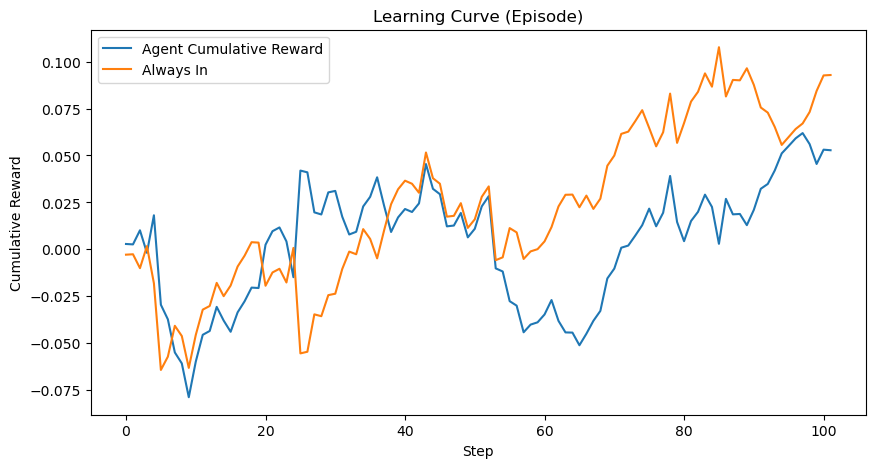

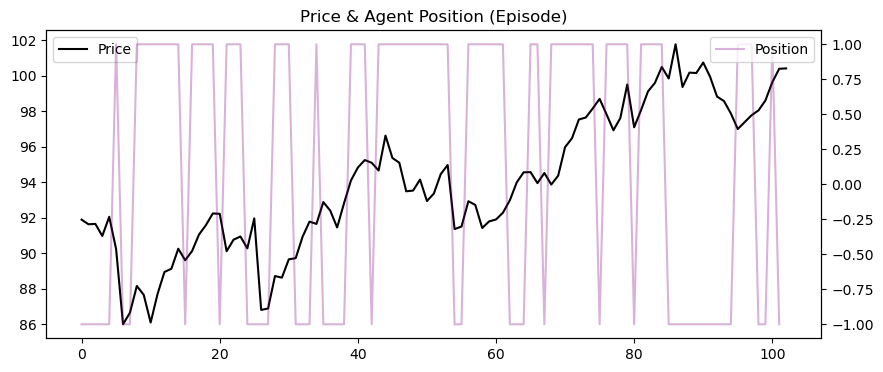

In [52]:
env = SequenceAwareNormAbsMoveEnv(df, feature_cols=FEATURE_COLS, episode_length=100, seed=42)
agent = SequenceAwareBaselineTradingAgent(df, feature_cols=FEATURE_COLS, episode_length=100, seed=42)
trajectory = run_policy_on_env(env, agent)
diagnostics = reward_diagnostics(trajectory)

Agent total reward:  0.02879770012190429
Opportunity (sum abs price moves):  91.85000000000002
Opportunity capture rate: 0.03%
Always in total reward:  0.09286880782875676


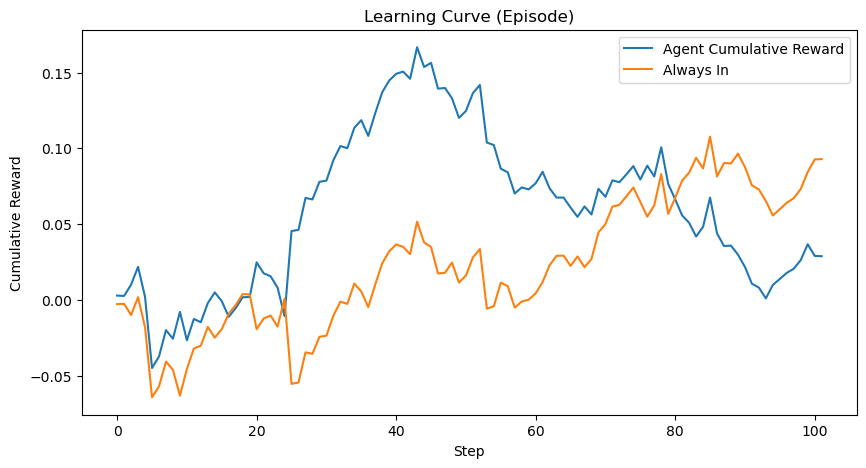

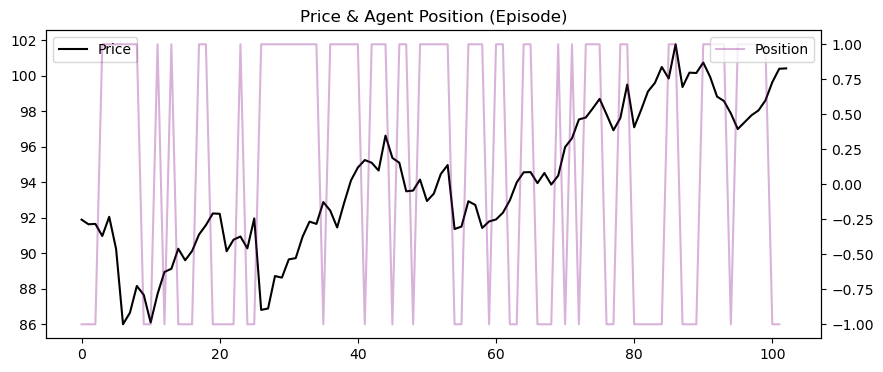

In [53]:
env = SequenceAwareCumulativeTradingEnv(df, feature_cols=FEATURE_COLS, episode_length=100, seed=42)
agent = SequenceAwareBaselineTradingAgent(df, feature_cols=FEATURE_COLS, episode_length=100, seed=42)
trajectory = run_policy_on_env(env, agent)
diagnostics = reward_diagnostics(trajectory)

## Statistical benchmark
**Summary of What to Look For:**
* Higher agent reward + higher real returns = better (but check stability!)
* Statistically significant difference (p < 0.05) = not just noise
* High correlation with out-of-sample profit/alpha = well-aligned
* Consistent across regimes = robust



In [ ]:
xxxxxxxxxxxxxxxxxxxxxxx

In [29]:
info

{'regime': 0,
 'episode_sharpe': 0.07301106358009378,
 'episode_sortino': 0.11121399514123961,
 'rewards_history': array([ 0.        , -0.        , -0.00505136, -0.00096331, -0.01054437,
         0.00919217, -0.00196414, -0.00166834, -0.00059967, -0.01201468,
         0.01263895,  0.00225159,  0.00802374, -0.00337027, -0.0054163 ,
        -0.00463543, -0.00719125,  0.01167974,  0.01284525,  0.00519438,
        -0.00629284, -0.00362762, -0.00233368, -0.00999092,  0.0111644 ,
         0.0032423 ,  0.00398115,  0.00060694,  0.00018307, -0.0003236 ,
         0.00204315, -0.0255417 , -0.00178054, -0.01499194, -0.00459604,
        -0.0069798 ,  0.02160677,  0.00646634, -0.00741666, -0.01589818,
         0.00055317, -0.00941176,  0.00712251,  0.00537802,  0.01053692,
         0.01043276,  0.00977424,  0.00668151, -0.00255276,  0.00921344,
        -0.00388842,  0.00466735, -0.00385876,  0.00999804,  0.00470696,
         0.01536434, -0.01551247,  0.0017391 ,  0.00792699,  0.01337558,
         0

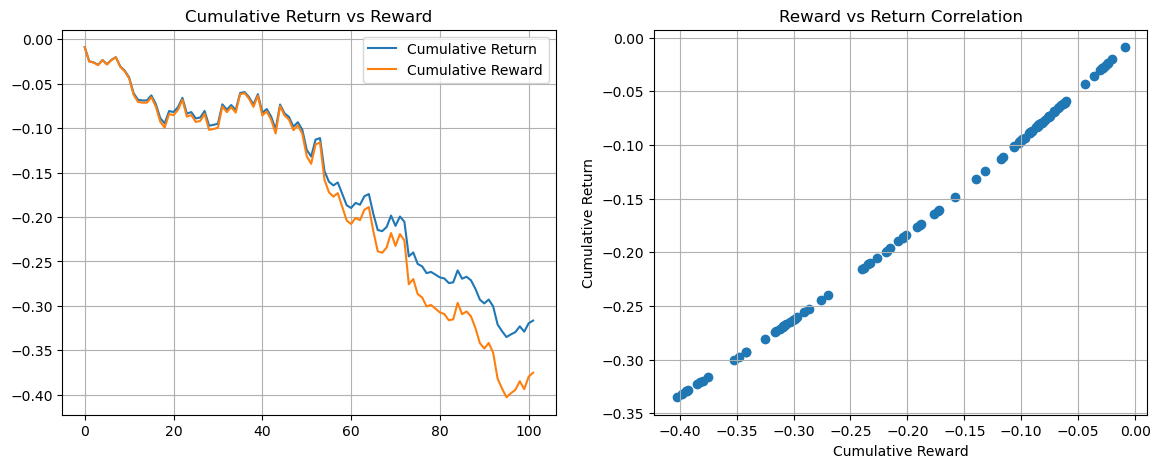

In [30]:
# REWARD ANALYSIS

import matplotlib.pyplot as plt

# Pick one episode
info = random_agent_infos[0]  # or any i
rewards = info["episode_total_reward"]
returns = info["returns"]
cum_rewards = np.cumsum(info["returns"] * info["performed_action_history"][1:])  # or info['reward_history'] if saved
cum_returns = np.cumprod(1 + np.array(returns)) - 1

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(cum_returns, label="Cumulative Return")
plt.plot(np.cumsum(info["rewards_history"]), label="Cumulative Reward")
plt.title("Cumulative Return vs Reward")
plt.legend(); plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(np.cumsum(info["rewards_history"]), cum_returns)
plt.xlabel("Cumulative Reward")
plt.ylabel("Cumulative Return")
plt.title("Reward vs Return Correlation")
plt.grid(True)
plt.show()

          reward    return     alpha
reward  1.000000  0.988937  0.986482
return  0.988937  1.000000  0.997352
alpha   0.986482  0.997352  1.000000


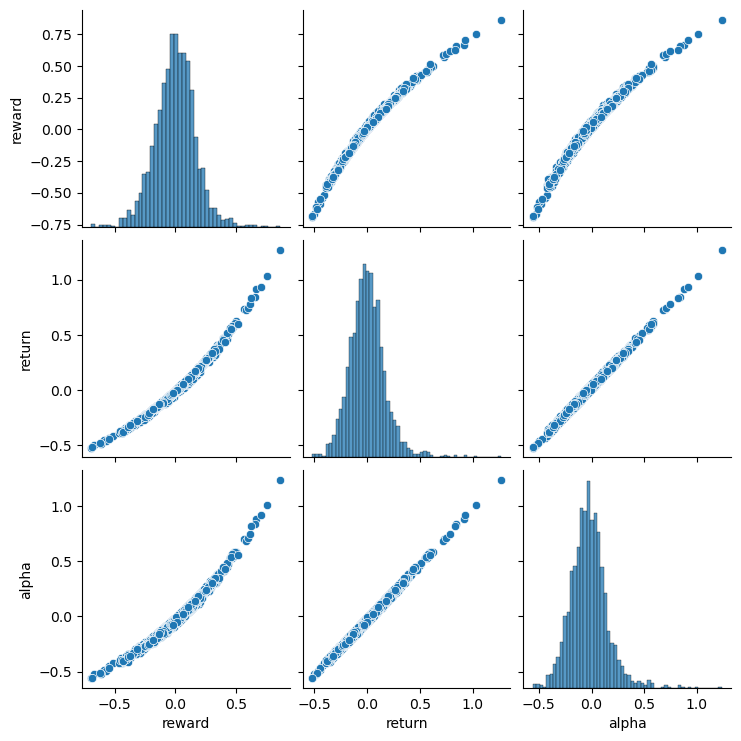

In [31]:
reward_list = []
return_list = []
alpha_list = []

for info in random_agent_infos:
    reward_list.append(np.sum(info["rewards_history"]))
    return_list.append(info["final_wealth"] - 1)
    alpha_list.append(info["alpha"])

import pandas as pd
df = pd.DataFrame({
    "reward": reward_list,
    "return": return_list,
    "alpha": alpha_list
})

print(df.corr())
import seaborn as sns
sns.pairplot(df)